In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
#from mlxtend.classifier import OneRClassifier
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import balanced_accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report

In [10]:
df_patients = pd.read_csv('2021VAERSDATA.csv',engine='python')
df_symptoms = pd.read_csv('2021VAERSSYMPTOMS.csv',encoding= 'unicode_escape')
df_vax = pd.read_csv('2021VAERSVAX.csv', engine='python')

In [11]:
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

In [12]:
statistics(df_patients)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
ER_VISIT,1,569449,99.990869,object
X_STAY,1,569195,99.946269,object
BIRTH_DEFECT,1,569178,99.943284,object
RPT_DATE,109,569151,99.938543,object
V_FUNDBY,5,569108,99.930992,object
CAGE_MO,11,567757,99.693767,float64
DATEDIED,297,563051,98.867430,object
DIED,1,562319,98.738896,object
DISABLE,1,560782,98.469011,object


In [13]:
statistics(df_symptoms)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
SYMPTOM5,5647,637769,66.116019,object
SYMPTOMVERSION5,3,637769,66.116019,float64
SYMPTOM4,6099,527861,54.722114,object
SYMPTOMVERSION4,3,527861,54.722114,float64
SYMPTOM3,6700,390150,40.445937,object
SYMPTOMVERSION3,3,390150,40.445937,float64
SYMPTOM2,7183,215678,22.358833,object
SYMPTOMVERSION2,3,215678,22.358833,float64


In [14]:
statistics(df_vax)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
VAX_LOT,27136,183955,30.964581,object
VAX_SITE,11,153591,25.853502,object
VAX_ROUTE,9,133916,22.541669,object
VAX_DOSE_SERIES,8,2490,0.419134,object


In [7]:
# def cols_all_nan(df):
#     ''' Returns columns with NaN for every row in df
    
#     INPUT:
#     df - pandas dataframe
    
#     OUTPUT:
#     list of column indices for all columns with all NaN values 
#     '''
#     return df.columns[df.isnull().all()]

In [8]:
# def cols_with_nan(df, percentage):
#     '''Returns the column names that have more than (percentage * 100) %
#     of their values missing
    
#     INPUT:
#     df - pandas dataframe
#     percentage - float, percentage of values missing

#     OUTPUT:
#     list of column indices for all columns where more than (percentage * 100) %
#     of their values are missing
#     '''
#     return df.columns[np.sum(df.isnull())/df.shape[0] > percentage]

In [90]:
# print(cols_with_nan(df_patients, 0.5))
# print(cols_with_nan(df_symptoms, 0.5))
# print(cols_with_nan(df_vax, 0.5))

In [15]:
# column "ER_VISIT" is NaN for all entries except 4, for form 2 replaced by "ER_ED_VISIT" -> can be dropped (only few entries with form 1)
df_patients.drop(columns="ER_VISIT", inplace=True)

# cage_mo: calculated age of patient in months -> only available for babies <= 2.0 years (= 8 patients, 0.2% of data) 
# -> decision: age in years is enough for now 
df_patients.drop(columns="CAGE_MO", inplace=True)

# column "RPT_Date" only available for 7 patients (= date form was completed), discontinued for form 2 -> can be dropped
df_patients.drop(columns="RPT_DATE", inplace=True)

# column "V_FUNDBY" is VAERS1 only field, (= funds used to purchase the vaccines) -> not relevant to us, can be dropped
df_patients.drop(columns="V_FUNDBY", inplace=True)

In [16]:
y_cols = ["ER_ED_VISIT", "DIED", "L_THREAT", "HOSPITAL", "X_STAY", "DISABLE", "BIRTH_DEFECT", "OFC_VISIT"]

for col in y_cols:
    df_patients[col] = np.where(df_patients[col] == "Y", 1, 0)

In [17]:
df_patients["CUR_ILL"].replace(
    ["None", "No", "NONE", "unknown", "Unknown", "none", "no", "None known", "none known", 
     "None reported", "none reported", "UNKNOWN", "N/a", "None stated/Denied",
    "No other illness prior to vaccination or within the month prior", "NKDA", 
     "Individual was healthy prior to vaccination.", "None.", "UNK", "As noted above", "unsure", 
     "See item 12", "no acute illnesses", "No symptoms after COVID vaccinations"], 
    np.nan, inplace=True)
df_patients["CUR_ILL"].replace("Covid 19", "COVID_19", inplace=True)

In [18]:
# for the column "ALLERGIES", some of the entries are "None" or "No" (as string) -> change to NaN
df_patients["ALLERGIES"].replace(
    ["None", "none", "NKDA", "NKA", "No known allergies", "unknown", 
     "No", "Unknown", "no", "NONE", "No Known Allergies", "no known allergies",
    "nka", "None known", "NKA to medications", "No known allergies to drugs or food"], np.nan, inplace=True)

In [19]:
# for the column "HISTORY", some of the entries are "None" or "No" (as string) -> change to NaN
df_patients["HISTORY"].replace(["None", "none", "unknown", "unsure", "Unknown", "no", 
                                "Unsure", "No", "NONE", "UNKNOWN", "N/a", "None known",
                               "None reported", "none reported", "None stated/Denied", 
                                "none known", "Medical History/Concurrent Conditions: No adverse event (No reported medical history.)",
                                "Medical History/Concurrent Conditions: No adverse event (No reported medical history)", "None disclosed"
                               ], np.nan, inplace=True)

In [20]:
df_patients["OTHER_MEDS"].replace(["None", "none", "unknown", "Unknown", "no", "NONE", "UNKNOWN", "No"]
                                 , np.nan, inplace=True)


In [21]:
# Replacing NaN value with 0 makes sense for counting of days being hospitalized
df_patients["HOSPDAYS"].replace(np.nan, 0, inplace=True)

In [22]:
# Transform the symptoms dataset so that there is only one column for the symptoms
df_symptoms_m = pd.melt(df_symptoms, id_vars=['VAERS_ID'], value_vars=['SYMPTOM1', 'SYMPTOM2', 
                                                                'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'],
                     var_name='NUMBER', value_name='SYMPTOM')
df_symptoms_m.dropna(subset=['SYMPTOM'], inplace=True)


df_symptoms_m.head()

,VAERS_ID,NUMBER,SYMPTOM
0,916600,SYMPTOM1,Dysphagia
1,916601,SYMPTOM1,Anxiety
2,916602,SYMPTOM1,Chest discomfort
3,916603,SYMPTOM1,Dizziness
4,916604,SYMPTOM1,Injection site erythema


In [23]:
# exclude symptoms that are no symptoms (found during analysis)
no_symptoms = ["SARS-CoV-2 test negative", "Computerised tomogram", "Exposure to SARS-CoV-2",
              "Laboratory test", "Electrocardiogram", "Blood test", "Chest X-ray", 
               "Magnetic resonance imaging", "Full blood count"]
df_symptoms_m = df_symptoms_m[~df_symptoms_m["SYMPTOM"].isin(no_symptoms)]

In [24]:
covid_ids = df_vax[df_vax["VAX_TYPE"] == "COVID19"]["VAERS_ID"].unique().tolist()
print("# Patients with covid vaccination: ", len(covid_ids))
covid_patients = df_patients[df_patients["VAERS_ID"].isin(covid_ids)]
print("# Patients of reduced patients dataset: ", covid_patients["VAERS_ID"].shape)
covid_symptoms = df_symptoms_m[df_symptoms_m["VAERS_ID"].isin(covid_ids)]
print("# Patients of reduced symptoms dataset: ", covid_symptoms["VAERS_ID"].shape)
covid_vax = df_vax[df_vax["VAX_TYPE"]=="COVID19"]
print("# Patients of reduced vax dataset: ", covid_vax["VAERS_ID"].shape)

# Patients with covid vaccination:  558403
# Patients of reduced patients dataset:  (558403,)
# Patients of reduced symptoms dataset:  (2334303,)
# Patients of reduced vax dataset:  (578277,)


In [25]:
patient_symp = covid_patients.merge(covid_symptoms, on="VAERS_ID")
patient_symp.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,NUMBER,SYMPTOM
0,916600,01/01/2021,TX,33.0,33.0,F,Right side of epiglottis swelled up and hinder...,0,NaN,0,...,NaN,NaN,2,01/01/2021,0,1,0,Pcn and bee venom,SYMPTOM1,Dysphagia
1,916600,01/01/2021,TX,33.0,33.0,F,Right side of epiglottis swelled up and hinder...,0,NaN,0,...,NaN,NaN,2,01/01/2021,0,1,0,Pcn and bee venom,SYMPTOM2,Epiglottitis
2,916601,01/01/2021,CA,73.0,73.0,F,Approximately 30 min post vaccination administ...,0,NaN,0,...,NaN,NaN,2,01/01/2021,0,1,0,"""Dairy""",SYMPTOM1,Anxiety
3,916601,01/01/2021,CA,73.0,73.0,F,Approximately 30 min post vaccination administ...,0,NaN,0,...,NaN,NaN,2,01/01/2021,0,1,0,"""Dairy""",SYMPTOM2,Dyspnoea
4,916602,01/01/2021,WA,23.0,23.0,F,"About 15 minutes after receiving the vaccine, ...",0,NaN,0,...,NaN,NaN,2,01/01/2021,0,0,1,Shellfish,SYMPTOM1,Chest discomfort


In [26]:
pt_symp_vax = patient_symp.merge(covid_vax[["VAERS_ID", "VAX_MANU"]], on="VAERS_ID")
pt_symp_vax.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,NUMBER,SYMPTOM,VAX_MANU
0,916600,01/01/2021,TX,33.0,33.0,F,Right side of epiglottis swelled up and hinder...,0,NaN,0,...,NaN,2,01/01/2021,0,1,0,Pcn and bee venom,SYMPTOM1,Dysphagia,MODERNA
1,916600,01/01/2021,TX,33.0,33.0,F,Right side of epiglottis swelled up and hinder...,0,NaN,0,...,NaN,2,01/01/2021,0,1,0,Pcn and bee venom,SYMPTOM2,Epiglottitis,MODERNA
2,916601,01/01/2021,CA,73.0,73.0,F,Approximately 30 min post vaccination administ...,0,NaN,0,...,NaN,2,01/01/2021,0,1,0,"""Dairy""",SYMPTOM1,Anxiety,MODERNA
3,916601,01/01/2021,CA,73.0,73.0,F,Approximately 30 min post vaccination administ...,0,NaN,0,...,NaN,2,01/01/2021,0,1,0,"""Dairy""",SYMPTOM2,Dyspnoea,MODERNA
4,916602,01/01/2021,WA,23.0,23.0,F,"About 15 minutes after receiving the vaccine, ...",0,NaN,0,...,NaN,2,01/01/2021,0,0,1,Shellfish,SYMPTOM1,Chest discomfort,PFIZER\BIONTECH


In [82]:
pt_symp_vax.shape

(2436701, 34)

In [27]:
# Bar Plots 

def bar_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

In [28]:
def pie_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title)
    plt.show()

In [29]:
def plot_pie(labels, sizes, explode, save_title=None):
   
    fig1, ax1 = plt.subplots()
    
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  
    if save_title != None:
        path = "plots/" + save_title
        plt.savefig(path, bbox_inches = "tight")

    plt.show() 

In [30]:
 def bar_plot(values, title, save_title=None):
    
    ax = values.plot(kind='bar')
    t = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(title)
    if save_title != None:
         path = "plots/" + save_title
         plt.savefig(path, bbox_inches = "tight")
    
    plt.show()

# filtering patients based on patient covid -19 test 

In [31]:
# relevant values / modifications
all_patients = covid_patients["VAERS_ID"].nunique()

pos = "SARS-CoV-2 test positive"
cov_pos_id = covid_symptoms[covid_symptoms["SYMPTOM"] == pos]["VAERS_ID"].unique()

# all patients not tested positive for Covid (excluded starting from Q 1.1)
all_patients_nc = covid_patients[~covid_patients["VAERS_ID"].isin(cov_pos_id)]["VAERS_ID"].nunique()

# the below bar chat represents the count of entries registered for each covid -19 vaccine manufaturer  from the analysis we can see majority of the vaccines are from moderna, pfizer and janssen 

Total unique values are:  4 


Category	Value

MODERNA                 279906
PFIZER\BIONTECH         244951
JANSSEN                  52191
UNKNOWN MANUFACTURER      1229
Name: VAX_MANU, dtype: int64


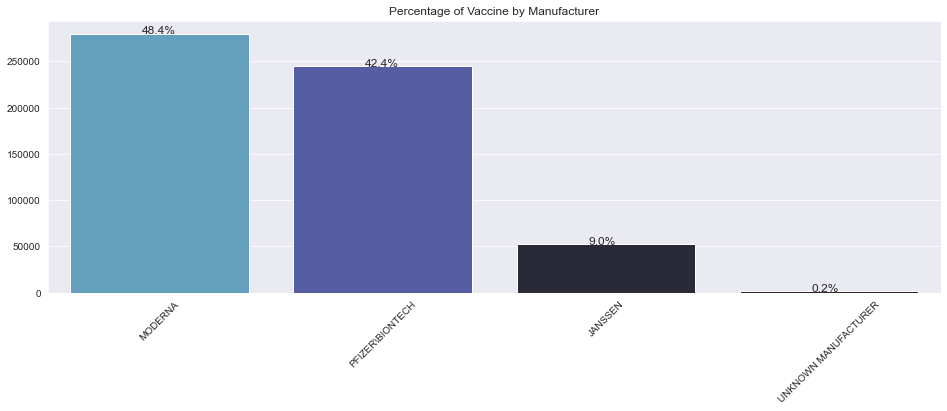

In [37]:
bar_plots(covid_vax.VAX_MANU, "Percentage of Vaccine by Manufacturer")

In [38]:
# bar_plot(covid_vax["VAX_MANU"].value_counts(), "Vaccination Manufacturers")

# from the above analysis we wanted to check the percentage of the entries for top two manufaturese 

In [39]:
# pfizer = covid_vax[covid_vax["VAX_MANU"] == "PFIZER\BIONTECH"].shape[0]
# moderna = covid_vax[covid_vax["VAX_MANU"] == "MODERNA"].shape[0]
# print("{:.1f} % of the vaccinations are from PFIZER/BIONTECH, {:.1f} % are from MODERNA.".format(
# (pfizer/all_patients * 100), (moderna/all_patients * 100)))

# 2 finding state wise data entries for the adverse effects reported  after getting covid -19  vaccination 

In [40]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)
pd.set_option('max_columns', 42)
pd.set_option('max_rows', 42)

Total unique values are:  64 


Category	Value

CA    54670
FL    33197
TX    31322
NY    30377
IN    21507
PA    20580
IL    18007
OH    16803
MI    16344
NJ    15774
Name: STATE, dtype: int64


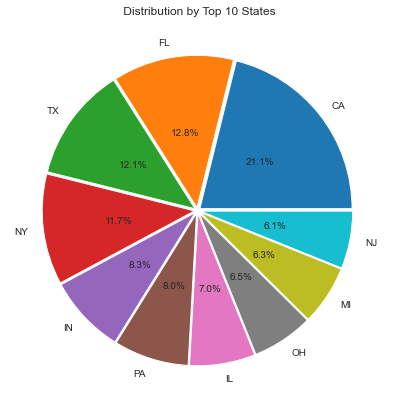

In [41]:
pie_plots(covid_patients.STATE, " Distribution by Top 10 States",limited=True, n=10)

In [42]:
# bar_plot(covid_patients["STATE"].value_counts()[:15], "15 States with most data entries")

# 3 sex ration of the reportees after getting vaccination 

In [43]:
sex = covid_patients["SEX"].value_counts()
ratio_f = sex["F"] / all_patients * 100
ratio_m = sex["M"] / all_patients * 100
ratio_u = sex["U"] / all_patients * 100
ratio_f
print("Ratio Female: {:.1f} %, Ratio Male: {:.1f} %, Ratio Unkown: {:.1f} %".format(ratio_f, ratio_m, ratio_u))

Ratio Female: 68.5 %, Ratio Male: 28.1 %, Ratio Unkown: 3.3 %


RECOVD         N         U         Y
SEX                                 
F       0.399603  0.227780  0.372617
M       0.373519  0.255021  0.371461
U       0.135925  0.597909  0.266167


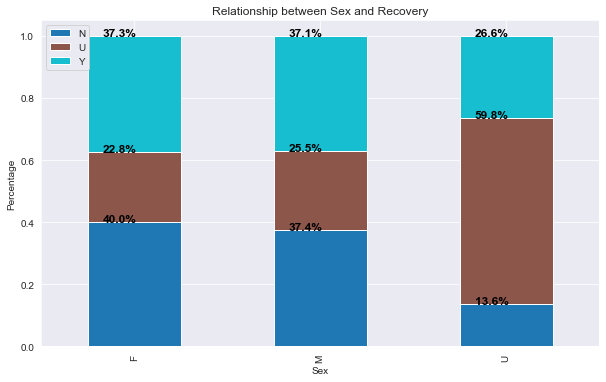

In [85]:
# import matplotlib.patches as mpatches

# total = covid_patients.groupby('SEX')['AGE_YRS'].count().reset_index()
# RECOVD_Y = covid_patients[covid_patients.RECOVD=='Y'].groupby('SEX')['AGE_YRS'].count().reset_index()
# RECOVD_Y['AGE_YRS'] = [i / j * 100 for i,j in zip(RECOVD_Y['AGE_YRS'], total['AGE_YRS'])]
# total['AGE_YRS'] = [i / j * 100 for i,j in zip(total['AGE_YRS'], total['AGE_YRS'])]


# bar1 = sns.barplot(x="SEX",  y="AGE_YRS", data=total, color='darkblue')

# bar2 = sns.barplot(x="SEX", y="AGE_YRS", data=RECOVD_Y, color='lightblue')

# top_bar = mpatches.Patch(color='darkblue', label='RECOVD = No')
# bottom_bar = mpatches.Patch(color='lightblue', label='RECOVD = Yes')
# bar1.set(xlabel="Sex",ylabel="Percentage")
# plt.legend(handles=[top_bar, bottom_bar])
# plt.title("Relationship between Sex and Recovery Percentage")

# plt.show()

df_copy=covid_patients[["SEX","RECOVD"]]
#output=['Y','N']
#df_copy= df_copy[df_copy.RECOVD.isin(output)]
# df_copy1=df_copy.RECOVD.isin("Y","N")
cross_tab_prop = pd.crosstab(index=df_copy['SEX'],
                             columns=df_copy['RECOVD'],
                             normalize="index")
print(cross_tab_prop)

cross_tab = pd.crosstab(index=df_copy['SEX'],
                        columns=df_copy['RECOVD'])
cross_tab

cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left")
plt.xlabel("Sex")
plt.ylabel("Percentage")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
               
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.title("Relationship between Sex and Recovery")
plt.show()

In [45]:
# bar_plot(sex, "Sex")

# 4 top ten systomps which are seen commonly among the people who reported after getting covid 19 vaccines 

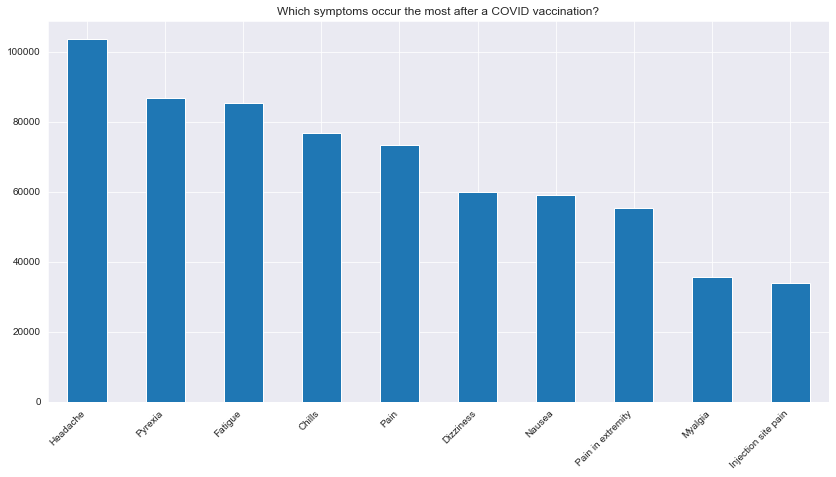

In [46]:
symptom_values = covid_symptoms["SYMPTOM"].value_counts()
bar_plot(symptom_values[:10], "Which symptoms occur the most after a COVID vaccination?")

In [47]:
# Severeness of symptoms: How many patients were hospitalized?
hospitalized = patient_symp[(patient_symp["HOSPITAL"] == 1) & (patient_symp["VAERS_ID"].isin(cov_pos_id))]
count_hospitalized = hospitalized["VAERS_ID"].nunique()

# labels = 'Patients hospitalized', 'Others'
# sizes = [count_hospitalized, (all_patients_nc-count_hospitalized)]
# explode = (0.05, 0)
# plot_pie(labels, sizes, explode)

# print(count_hospitalized, " patients were hospitalized.")
# bar_plot(hospitalized["HOSPDAYS"].value_counts()[:15], "Numbers of days the patients were hospitalized")

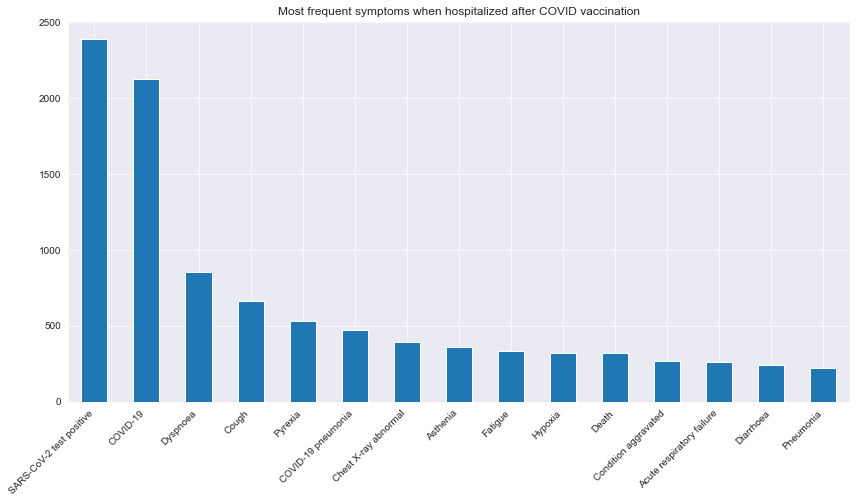

In [48]:
longer_hospitalized = hospitalized[hospitalized["HOSPDAYS"] > 0]
bar_plot(longer_hospitalized["SYMPTOM"].value_counts()[:15], 
         "Most frequent symptoms when hospitalized after COVID vaccination")

6952 patients died after vaccination.


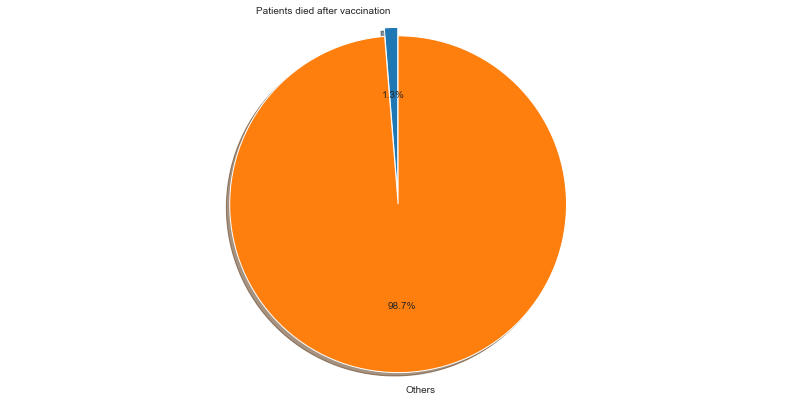

In [49]:
died = patient_symp[(patient_symp["DIED"] == 1)]
persons_died = died["VAERS_ID"].nunique()
print(persons_died, "patients died after vaccination.")
death_ratio = persons_died / all_patients_nc

labels = 'Patients died after vaccination', 'Others'
sizes = [persons_died, (all_patients_nc-persons_died)]
explode = (0.05, 0)

plot_pie(labels, sizes, explode) 

In [50]:
# bar_plot(died["SYMPTOM"].value_counts()[1:15], "Most frequent symptoms for patients who died")

Of all patients who died,  58.85% (4091 patients) had a history of illness at the time of vaccination.
Of all patients who died,  28.80% (2002 patients) were ill at the time of vaccination.


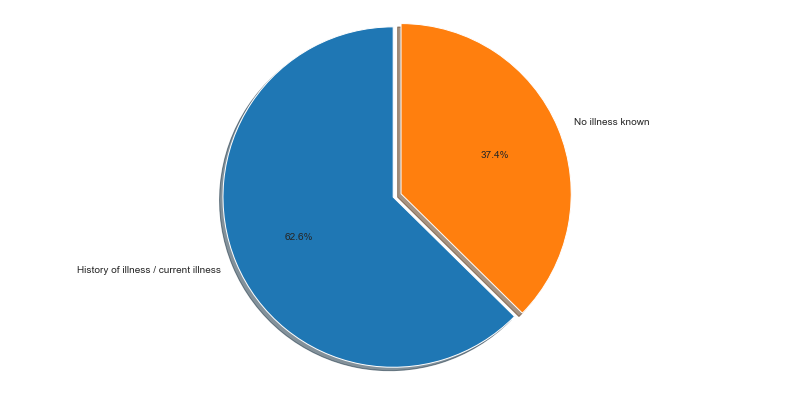

In [51]:
history = died[died["HISTORY"].notnull()]["VAERS_ID"]
illness = died[died["CUR_ILL"].notnull()]["VAERS_ID"]
history_nr = history.nunique()
illness_nr = illness.nunique()

history_illness = pd.concat([history, illness], ignore_index=True, sort=False)
history_illness_nr = history_illness.nunique()


ratio_history_death = history_nr / persons_died * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) had a history of illness at the time of vaccination.".format(ratio_history_death, history_nr)) 

ratio_illness_death = illness_nr / persons_died * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) were ill at the time of vaccination.".format(ratio_illness_death, illness_nr)) 


labels = 'History of illness / current illness', 'No illness known'
sizes = [history_illness_nr, (persons_died-history_illness_nr)]
explode = (0.05, 0)

plot_pie(labels, sizes, explode) 

In [52]:
history_all = patient_symp[(patient_symp["HISTORY"].notnull()) & (~patient_symp["VAERS_ID"].isin(cov_pos_id))]["VAERS_ID"]
illness_all = patient_symp[(patient_symp["CUR_ILL"].notnull()) & (~patient_symp["VAERS_ID"].isin(cov_pos_id))]["VAERS_ID"]

history_nr_all = history_all.nunique()
illness_nr_all = illness_all.nunique()

history_illness_all = pd.concat([history_all, illness_all], ignore_index=True, sort=False)
history_illness_nr_all = history_illness_all.nunique()

ratio_history_all = history_nr_all / all_patients_nc * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) had a history of illness at the time of vaccination.".format(ratio_history_all, history_nr_all)) 

ratio_illness_all = illness_nr_all / all_patients_nc * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) were ill at the time of vaccination.".format(ratio_illness_all, illness_nr))

Of all patients who died,  45.34% (247371 patients) had a history of illness at the time of vaccination.
Of all patients who died,  14.22% (2002 patients) were ill at the time of vaccination.


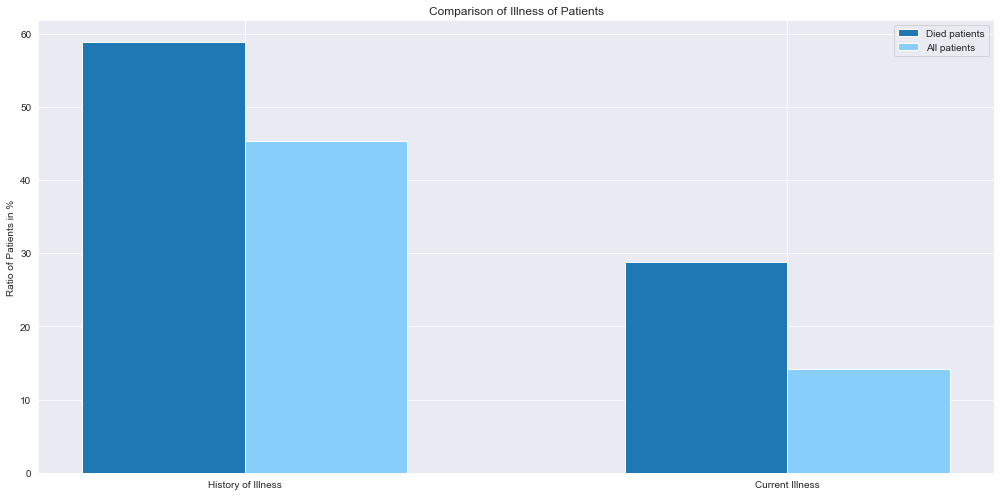

In [53]:
labels = ['History of Illness', 'Current Illness']
died_values = [ratio_history_death, ratio_illness_death]
all_values = [ratio_history_all, ratio_illness_all]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, died_values, width, label='Died patients')
rects2 = ax.bar(x + width/2, all_values, width, label='All patients', color="lightskyblue")

ax.set_ylabel('Ratio of Patients in %')
ax.set_title('Comparison of Illness of Patients')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

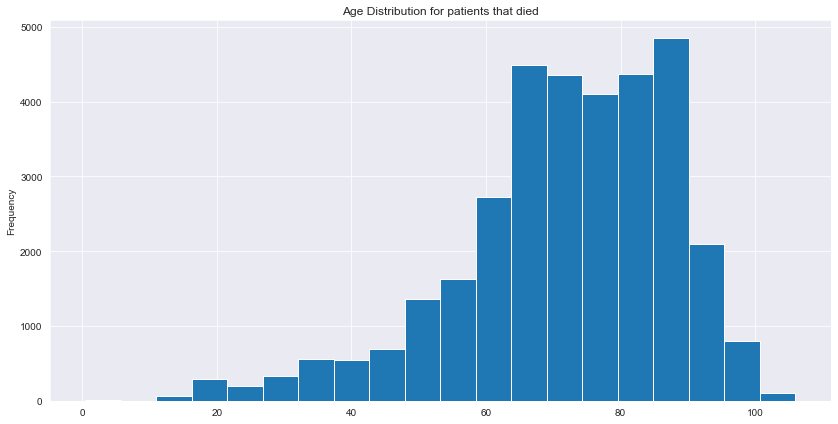

In [54]:
ax = died["AGE_YRS"].plot(kind='hist', bins=20)
ax.set_title("Age Distribution for patients that died")

plt.show()

#  filtering data before modeling 

In [55]:
fx = pt_symp_vax.drop(['RECVDATE','CAGE_YR','DATEDIED','ONSET_DATE','V_ADMINBY','SYMPTOM_TEXT','OTHER_MEDS','SPLTTYPE','FORM_VERS','ALLERGIES','PRIOR_VAX','HISTORY','CUR_ILL','LAB_DATA','TODAYS_DATE'],axis=1)

In [56]:
fx = fx[pd.DatetimeIndex(fx['VAX_DATE']).year==2021]
fx = fx[fx['AGE_YRS']>12]

In [57]:
output=['Y','N']
fx= fx[fx.RECOVD.isin(output)]

In [58]:
fx["STATE"].fillna("Unknown",inplace=True)

In [59]:
fx["NUMDAYS"].fillna(fx["NUMDAYS"].mean(),inplace=True)

In [60]:
fx.isna().sum()

VAERS_ID        0
STATE           0
AGE_YRS         0
SEX             0
DIED            0
L_THREAT        0
HOSPITAL        0
HOSPDAYS        0
X_STAY          0
DISABLE         0
RECOVD          0
VAX_DATE        0
NUMDAYS         0
BIRTH_DEFECT    0
OFC_VISIT       0
ER_ED_VISIT     0
NUMBER          0
SYMPTOM         0
VAX_MANU        0
dtype: int64

In [132]:
#dataxx = clean_data(fx)

In [63]:
fx["DIED"]

236        0
237        0
238        0
1311       0
1312       0
          ..
2436696    0
2436697    0
2436698    0
2436699    0
2436700    0
Name: DIED, Length: 1640026, dtype: int32

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_cols = [ "SEX", "SYMPTOM", "ER_ED_VISIT", "NUMDAYS", "RECOVD", "VAX_MANU", "L_THREAT", "HOSPITAL", "HOSPDAYS","BIRTH_DEFECT","DISABLE","DIED"]
for i in cat_cols:
    fx[i] = encoder.fit_transform(fx[i])

In [65]:
fx

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,NUMBER,SYMPTOM,VAX_MANU
236,916661,FL,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM1,1965,1
237,916661,FL,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM2,3817,1
238,916661,FL,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM3,5990,1
1311,916904,CA,49.0,1,0,0,0,0,0,0,1,01/01/2021,0,0,0,1,SYMPTOM1,1952,1
1312,916904,CA,49.0,1,0,0,0,0,0,0,1,01/01/2021,0,0,0,1,SYMPTOM1,8841,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436696,1708052,ME,42.0,0,0,0,0,0,0,0,1,06/10/2021,2,0,0,0,SYMPTOM3,4483,1
2436697,1708052,ME,42.0,0,0,0,0,0,0,0,1,06/10/2021,2,0,0,0,SYMPTOM4,5202,1
2436698,1708052,ME,42.0,0,0,0,0,0,0,0,1,06/10/2021,2,0,0,0,SYMPTOM5,5667,1
2436699,1708053,FL,68.0,1,0,0,0,0,0,0,0,02/07/2021,40,0,0,0,SYMPTOM1,8122,1


In [66]:
#x_cols = [ "AGE_YRS", "SEX", "SYMPTOM", "ER_ED_VISIT", "NUMDAYS", "VAX_MANU", "L_THREAT", "HOSPITAL", "HOSPDAYS","BIRTH_DEFECT","DISABLE","DIED"]
#y_col = "RECOVD"
#data, y = clean_data(fx, x_cols, y_col)

# supervised  learning task 1 

precting wether the a person will recover or not

## feature selection for 

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

X = fx[['DIED','AGE_YRS', 'ER_ED_VISIT', 'NUMDAYS', 'VAX_MANU', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS']] 
Y = fx[['RECOVD']]
# feature extraction
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


[26632.812  6689.747 11124.596 12862.749  3833.48   5241.651  8789.435
  5593.799]
[[ 0. 59.  0.  0.  1.  0.  0.  0.]
 [ 0. 59.  0.  0.  1.  0.  0.  0.]
 [ 0. 59.  0.  0.  1.  0.  0.  0.]
 [ 0. 49.  1.  0.  1.  0.  0.  0.]
 [ 0. 49.  1.  0.  1.  0.  0.  0.]]


In [68]:
## data=fx[['DIED','AGE_YRS', 'ER_ED_VISIT', 'NUMDAYS', 'VAX_MANU', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS','DISABLE']]
data=fx[['DIED','AGE_YRS', 'ER_ED_VISIT', 'NUMDAYS', 'VAX_MANU', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS']]
y=fx[['RECOVD']]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = .30, random_state=42)

In [70]:

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}



In [72]:
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
bl = DummyClassifier()
knn = KNeighborsClassifier()
dtc.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
bl.fit(X_train, y_train)
# Evaluate Model
bl_eval =evaluate_model(bl, X_test, y_test)
print(" base model accuracy",bl_eval['acc']*100)
dtc_eval = evaluate_model(dtc, X_test, y_test)
print(" decsion tree accuracy",dtc_eval['acc']*100)
rf_eval  =evaluate_model(rf, X_test, y_test)
print(" random forest accuracy",rf_eval['acc']*100)
nb_eval  =evaluate_model(nb, X_test, y_test)
print("navie bayes",nb_eval['acc']*100)
knn_eval =evaluate_model(knn, X_test, y_test)
print(" KNN accuracy",knn_eval['acc']*100)
lr_eval =evaluate_model(lr, X_test, y_test)
print(" logestic regression accuracy",lr_eval['acc']*100)

 base model accuracy 55.87470122437034
 decsion tree accuracy 68.25275198777256
 random forest accuracy 68.24624802848734
navie bayes 48.534983171005344
 KNN accuracy 64.2995642347279
 logestic regression accuracy 56.95069998861807


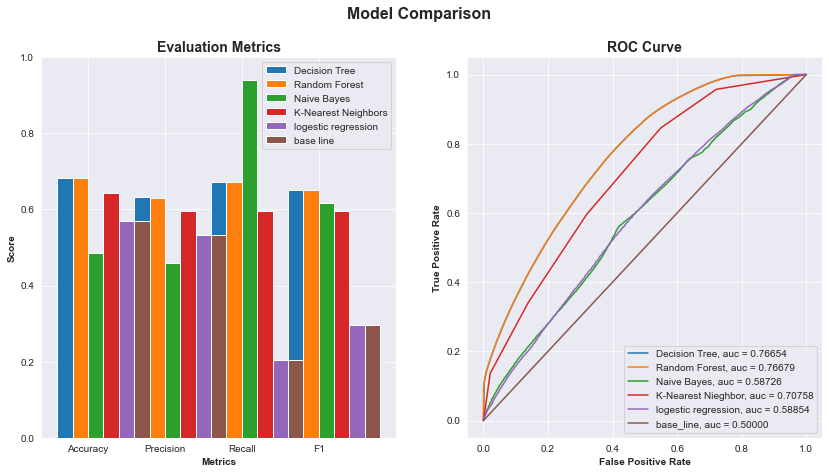

In [73]:

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
bl_score = [bl_eval['acc'], bl_eval['prec'], bl_eval['rec'], bl_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, lr_score, width=barWidth, edgecolor='white', label='logestic regression')
ax1.bar(r6, lr_score, width=barWidth, edgecolor='white', label='base line')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='logestic regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(bl_eval['fpr'], bl_eval['tpr'], label='base_line, auc = {:0.5f}'.format(bl_eval['auc']))
## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


In [74]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)

# random  forest accuracy after cross validation with 4 folds

In [75]:
scores.mean()

0.6824757653078937

# supervised lerning task 2 
### predict whether the  patient will be hospitilized 

In [76]:

def evaluate_model1(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.balanced_accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}



In [77]:
data=fx[[ 'AGE_YRS', 'SEX', 'SYMPTOM', 'ER_ED_VISIT', 'NUMDAYS', 'VAX_MANU']]
Y = fx[['HOSPITAL']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = .30, random_state=42)

In [80]:
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
bl = DummyClassifier()
knn = KNeighborsClassifier()
dtc.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
bl.fit(X_train, y_train)
# Evaluate Model
bl_eval =evaluate_model1(bl, X_test, y_test)
print(" base model accuracy",bl_eval['acc']*100)
dtc_eval = evaluate_model1(dtc, X_test, y_test)
print(" decsion tree accuracy",dtc_eval['acc']*100)
rf_eval  =evaluate_model1(rf, X_test, y_test)
print(" random forest accuracy",rf_eval['acc']*100)
nb_eval  =evaluate_model1(nb, X_test, y_test)
print("navie bayes",nb_eval['acc']*100)
knn_eval =evaluate_model1(knn, X_test, y_test)
print(" KNN accuracy",knn_eval['acc']*100)
lr_eval =evaluate_model1(lr, X_test, y_test)
print(" logestic regression accuracy",lr_eval['acc']*100)


 base model accuracy 50.0
 decsion tree accuracy 64.57917937884628
 random forest accuracy 65.3194666315636
navie bayes 55.32913684545944
 KNN accuracy 61.14191521127085
 logestic regression accuracy 53.182949445766425


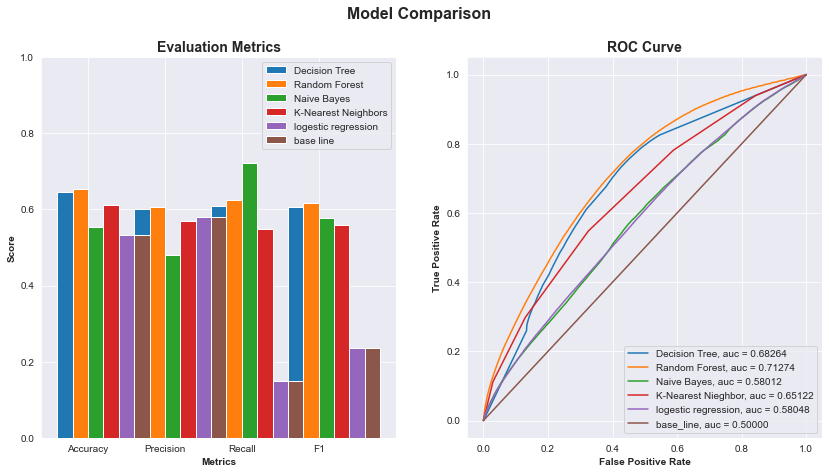

In [83]:

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
bl_score = [bl_eval['acc'], bl_eval['prec'], bl_eval['rec'], bl_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, lr_score, width=barWidth, edgecolor='white', label='logestic regression')
ax1.bar(r6, lr_score, width=barWidth, edgecolor='white', label='base line')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='logestic regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(bl_eval['fpr'], bl_eval['tpr'], label='base_line, auc = {:0.5f}'.format(bl_eval['auc']))
## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()



In [84]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [59]:
scores.mean()

0.6688767771189762

# unsupervised learning - k means clustering

In [44]:
from scipy.cluster.hierarchy import dendrogram,linkage

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,NUMBER,SYMPTOM,VAX_MANU
236,916661,10,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM1,2114,8
237,916661,10,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM2,4110,8
238,916661,10,59.0,0,0,0,0,0,0,0,1,01/01/2021,0,0,0,0,SYMPTOM3,6459,8
1311,916904,5,49.0,1,0,0,0,0,0,0,1,01/01/2021,0,0,0,1,SYMPTOM1,2101,8
1312,916904,5,49.0,1,0,0,0,0,0,0,1,01/01/2021,0,0,0,1,SYMPTOM1,9570,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984136,1919876,26,75.0,0,0,0,1,8,0,0,0,02/12/2021,288,0,0,1,SYMPTOM5,3002,8
2984137,1919876,26,75.0,0,0,0,1,8,0,0,0,02/12/2021,288,0,0,1,SYMPTOM5,5278,8
2984138,1919876,26,75.0,0,0,0,1,8,0,0,0,02/12/2021,288,0,0,1,SYMPTOM5,7748,8
2984139,1919878,53,82.0,1,1,0,0,0,0,0,0,11/26/2021,3,0,0,0,SYMPTOM1,2057,8


In [45]:
unsup= fx.drop(['VAERS_ID','VAX_DATE','BIRTH_DEFECT','OFC_VISIT','NUMBER','X_STAY'],axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_cols = [ "SEX","STATE", "RECOVD", "VAX_MANU","SYMPTOM"]
for i in cat_cols:
    unsup[i] = encoder.fit_transform(unsup[i])

In [ ]:
plt.figure(figsize = (8,7))
Z = linkage(unsup,'ward')
cluster = dendrogram(Z)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(unsup)
X

array([[-1.567, -1.068,  0.488, ..., -0.488, -1.131, -0.573],
       [-1.567, -1.068,  0.488, ..., -0.488, -0.313, -0.573],
       [-1.567, -1.068,  0.488, ..., -0.488,  0.651, -0.573],
       ...,
       [ 1.938, -0.149,  1.384, ...,  2.049,  1.18 , -0.573],
       [ 1.938,  1.401,  1.775, ..., -0.488, -1.155, -0.573],
       [ 1.938,  1.401,  1.775, ..., -0.488, -0.924, -0.573]])

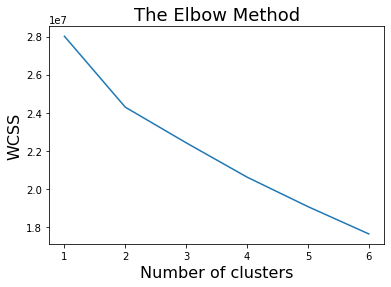

In [101]:
wcss=[]
number_clusters = range(1,7)
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

In [102]:
model = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans = model.fit_predict(unsup)

In [103]:
model.inertia_

3.8538618817755976e+16

In [104]:
pd.Series(y_kmeans).value_counts()

1    1209280
0     791978
dtype: int64

In [105]:
df_k = unsup.copy()
df_k["Cluster"] = y_kmeans

In [106]:
cluster0 = df_k[df_k.Cluster == 0]
cluster1 = df_k[df_k.Cluster == 1]
cluster2 = df_k[df_k.Cluster == 2]
cluster3 = df_k[df_k.Cluster == 3]

In [107]:
c0_stat = cluster0.describe()
c0_stat

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,NUMDAYS,ER_ED_VISIT,SYMPTOM,VAX_MANU,Cluster
count,7.919780e+05,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.000000,791978.0
mean,1.674633e+06,28.926000,51.358352,0.308385,0.033016,0.037949,0.166500,0.963957,0.057019,0.359100,28.195907,0.225496,4836.524482,9.410480,0.0
std,1.424657e+05,17.450118,18.365885,0.470451,0.178679,0.191074,0.372529,4.073442,0.231880,0.479737,58.022120,0.417909,2541.698775,1.980427,0.0
min,1.418608e+06,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.549789e+06,12.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2841.000000,8.000000,0.0
50%,1.681913e+06,28.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4744.000000,11.000000,0.0
75%,1.795965e+06,43.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,6729.000000,11.000000,0.0
max,1.919962e+06,60.000000,109.000000,2.000000,1.000000,1.000000,1.000000,94.000000,1.000000,1.000000,318.000000,1.000000,9661.000000,17.000000,0.0


In [108]:
c1_stat = cluster1.describe()
c1_stat

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,NUMDAYS,ER_ED_VISIT,SYMPTOM,VAX_MANU,Cluster
count,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1.209280e+06,1209280.0
mean,1.162598e+06,2.838283e+01,4.957795e+01,2.524808e-01,1.765017e-02,3.356129e-02,9.275933e-02,3.882310e-01,2.702352e-02,4.647170e-01,4.403723e+00,1.706784e-01,4.895469e+03,8.969624e+00,1.0
std,1.362599e+05,1.739602e+01,1.749379e+01,4.387090e-01,1.316763e-01,1.800971e-01,2.900950e-01,2.250556e+00,1.621520e-01,4.987538e-01,1.072545e+01,3.762279e-01,2.366663e+03,1.990407e+00,0.0
min,9.166610e+05,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.0
25%,1.047077e+06,1.200000e+01,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.930000e+03,8.000000e+00,1.0
50%,1.160717e+06,2.700000e+01,4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.796000e+03,8.000000e+00,1.0
75%,1.273793e+06,4.300000e+01,6.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,6.531000e+03,1.100000e+01,1.0
max,1.418607e+06,6.200000e+01,1.190000e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.500000e+01,1.000000e+00,1.000000e+00,1.680000e+02,1.000000e+00,9.661000e+03,1.700000e+01,1.0


In [109]:
c_means = pd.DataFrame([c0_stat.T.loc[: , "mean"], c1_stat.T.loc[: , "mean"]]).T
c_means.columns = ["Cluster_0 Mean", "Cluster_1 Mean"]
c_means

,Cluster_0 Mean,Cluster_1 Mean
VAERS_ID,1.674633e+06,1.162598e+06
STATE,2.892600e+01,2.838283e+01
AGE_YRS,5.135835e+01,4.957795e+01
SEX,3.083848e-01,2.524808e-01
DIED,3.301607e-02,1.765017e-02
L_THREAT,3.794929e-02,3.356129e-02
HOSPITAL,1.664996e-01,9.275933e-02
HOSPDAYS,9.639573e-01,3.882310e-01
DISABLE,5.701926e-02,2.702352e-02
RECOVD,3.590996e-01,4.647170e-01


# end of code #